In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
df = pd.read_csv('monthly-champagne-sales.csv')
df['Month'] = pd.to_datetime(df['Month'])
X = df['Month']
y = df['Sales']
df.head()

,Month,Sales
0,1964-01-01,2815
1,1964-02-01,2672
2,1964-03-01,2755
3,1964-04-01,2721
4,1964-05-01,2946


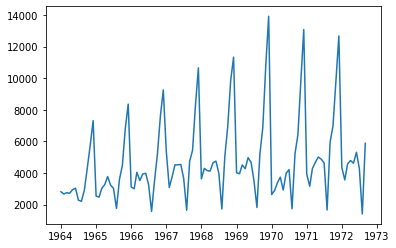

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('monthly-champagne-sales.csv')
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)

plt.plot(df['Sales'])
plt.show()

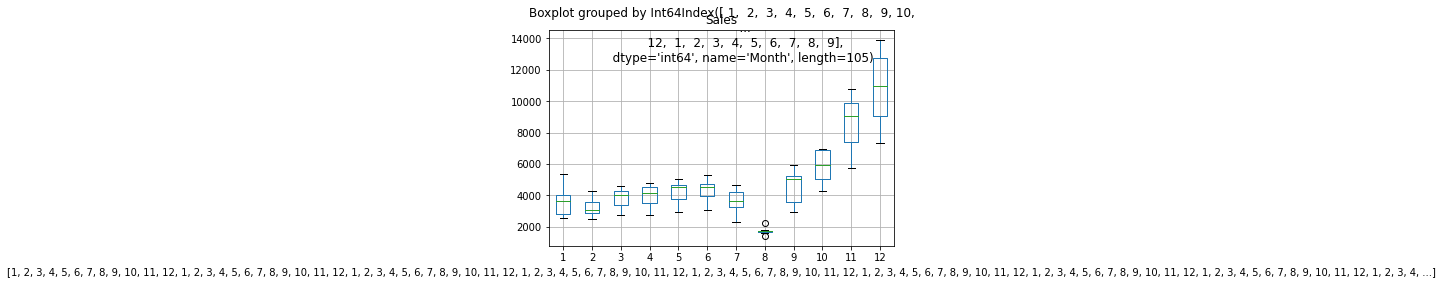

In [16]:
df.boxplot(column=['Sales'], by=df.index.month)
plt.show()

In [17]:
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA

X = df['Sales']
y = df.index

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = ARIMA(X_train, order=(1, 1, 1))
model_fit = model.fit()

In [18]:
from sklearn.metrics import mean_squared_error
predictions = model_fit.predict(start=len(X_train), end=len(X_train)+len(X_test)-1)
error = mean_squared_error(X_test.values,predictions)
print(f"Squared Error: {error}")

Squared Error: 5361345.69428137
